In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("./clean_data/creditcard_application_clean_data.csv") 
# reading cleaned data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   FLAG_OWN_CAR         36457 non-null  int64  
 2   FLAG_OWN_REALTY      36457 non-null  int64  
 3   ANNUAL_INCOME        36457 non-null  float64
 4   NAME_INCOME_TYPE     36457 non-null  int64  
 5   NAME_EDUCATION_TYPE  36457 non-null  int64  
 6   NAME_HOUSING_TYPE    36457 non-null  int64  
 7   AGE_YEARS            36457 non-null  float64
 8   EMPLOYMENT_LENGTH    36457 non-null  float64
 9   FLAG_MOBIL           36457 non-null  int64  
 10  FLAG_WORK_PHONE      36457 non-null  int64  
 11  FLAG_PHONE           36457 non-null  int64  
 12  FLAG_EMAIL           36457 non-null  int64  
 13  STATUS               36457 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 3.9 MB


In [4]:
data.shape

(36457, 14)

In [5]:
data.head()

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,ANNUAL_INCOME,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,AGE_YEARS,EMPLOYMENT_LENGTH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,STATUS
0,5008804,1,1,0.2587,4,1,4,0.32,0.12,1,1,0,0,1
1,5008805,1,1,0.2587,4,1,4,0.32,0.12,1,1,0,0,1
2,5008806,1,1,0.0552,4,4,1,0.58,0.03,1,0,0,0,0
3,5008808,0,1,0.1570,0,4,1,0.52,0.08,1,0,1,1,0
4,5008809,0,1,0.1570,0,4,1,0.52,0.08,1,0,1,1,0


In [6]:
import xgboost as xgb

In [7]:
data.columns

Index(['ID', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'ANNUAL_INCOME',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE',
       'AGE_YEARS', 'EMPLOYMENT_LENGTH', 'FLAG_MOBIL', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'STATUS'],
      dtype='object')

In [8]:
# Features - exclude ID(0) and status(13) columns
X = data.iloc[:,1:13]

# Label - select only status(13) column
y = data.iloc[:,13]

In [9]:
X

,FLAG_OWN_CAR,FLAG_OWN_REALTY,ANNUAL_INCOME,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,AGE_YEARS,EMPLOYMENT_LENGTH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL
0,1,1,0.2587,4,1,4,0.32,0.12,1,1,0,0
1,1,1,0.2587,4,1,4,0.32,0.12,1,1,0,0
2,1,1,0.0552,4,4,1,0.58,0.03,1,0,0,0
3,0,1,0.1570,0,4,1,0.52,0.08,1,0,1,1
4,0,1,0.1570,0,4,1,0.52,0.08,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
36452,1,1,0.1860,4,4,1,0.47,0.06,1,0,0,0
36453,0,1,0.0843,0,1,1,0.33,0.03,1,0,1,1
36454,0,1,0.0843,1,1,1,0.33,0.03,1,0,1,1
36455,0,1,0.1657,4,4,1,0.49,0.01,1,0,0,0


In [10]:
y

0        1
1        1
2        0
3        0
4        0
        ..
36452    1
36453    1
36454    1
36455    1
36456    1
Name: STATUS, Length: 36457, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=235)

In [12]:
xgb_cred = xgb.XGBClassifier(
 learning_rate =0.1,
 max_depth=10,
 min_child_weight=50,
 subsample=0.6,
 n_estimators=100,
 objective= 'binary:logistic'
)

In [13]:
xgb_cred.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=10, max_leaves=0, min_child_weight=50, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [14]:
# pred_class = xgb_cred.predict(X_test)
prob_credit = xgb_cred.predict_proba(X_test)

In [15]:
prob_credit

array([[0.9295438 , 0.07045621],
       [0.8993929 , 0.1006071 ],
       [0.87314075, 0.12685925],
       ...,
       [0.9089107 , 0.09108932],
       [0.9405551 , 0.05944493],
       [0.92386556, 0.07613445]], dtype=float32)

In [16]:
prob_credit_new = prob_credit[:,1]

In [17]:
prob_credit_new

array([0.07045621, 0.1006071 , 0.12685925, ..., 0.09108932, 0.05944493,
       0.07613445], dtype=float32)

In [18]:
np.quantile(prob_credit_new, 0.88)

0.1686547142267227

In [19]:
y_pred = np.where(prob_credit_new>=0.17,1,0)

In [20]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

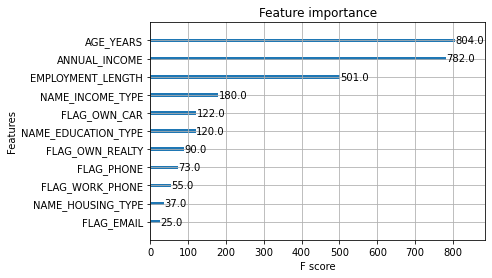

In [21]:
xgb.plot_importance(xgb_cred)
plt.rcParams['figure.figsize'] = [16, 10]
plt.show()

Accuracy:  82.36423477783873 %


[Text(0.5, 69.0, 'Predicted'), Text(123.0, 0.5, 'Actual')]

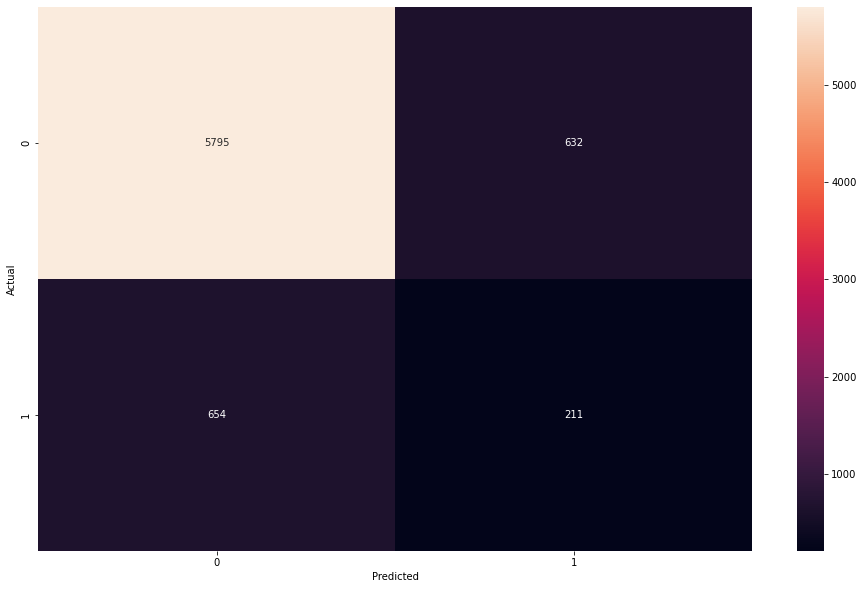

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy*100, "%")
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot = True, fmt = 'g')
ax.set(xlabel="Predicted", ylabel="Actual")

In [23]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier

params = {
    'learning_rate': [0.05,0.1,0.15,0.2,0.25,0.3],
    'max_depth':[5,10,15],
    'min_child_weight':[6,8,10,12],
    'subsample': [0.6,0.7,0.8,0.9], 
    'colsample_bytree':[0.6,0.7,0.8],
    'gamma':[i/10.0 for i in range(0,5)]
}

gs = GridSearchCV(
    estimator = XGBClassifier( 
        learning_rate =0.1,
        max_depth=10,
        min_child_weight=50,
        subsample=0.6,
        n_estimators=100,
        objective= 'binary:logistic'), 
    param_grid = params,
    n_jobs=4, 
    cv=5)

gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, m...
                                     max_leaves=None, min_child_weight=50,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                          

In [24]:
gs.best_params_, gs.best_score_

({'colsample_bytree': 0.6,
  'gamma': 0.2,
  'learning_rate': 0.2,
  'max_depth': 15,
  'min_child_weight': 6,
  'subsample': 0.8},
 0.8873307046116921)

In [32]:
optimized_xgbcred = xgb.XGBClassifier(
    learning_rate =0.2,
    n_estimators=100,
    max_depth=15,
    min_child_weight=6,
    gamma=0.2,
    subsample=0.8,
    colsample_bytree=0.6,
    objective= 'binary:logistic'
)
optimized_xgbcred.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.2, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=15, max_leaves=0, min_child_weight=6, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [33]:
prob_credit2 = optimized_xgbcred.predict_proba(X_test)
prob_credit_new2 = prob_credit2[:,1]

In [34]:
np.quantile(prob_credit_new2,0.88)

0.24125388264656067

In [35]:
y_pred_final = np.where(prob_credit_new2>=0.22,1,0)

Accuracy:  84.14701042238069 %


[Text(0.5, 69.0, 'Predicted'), Text(123.0, 0.5, 'Actual')]

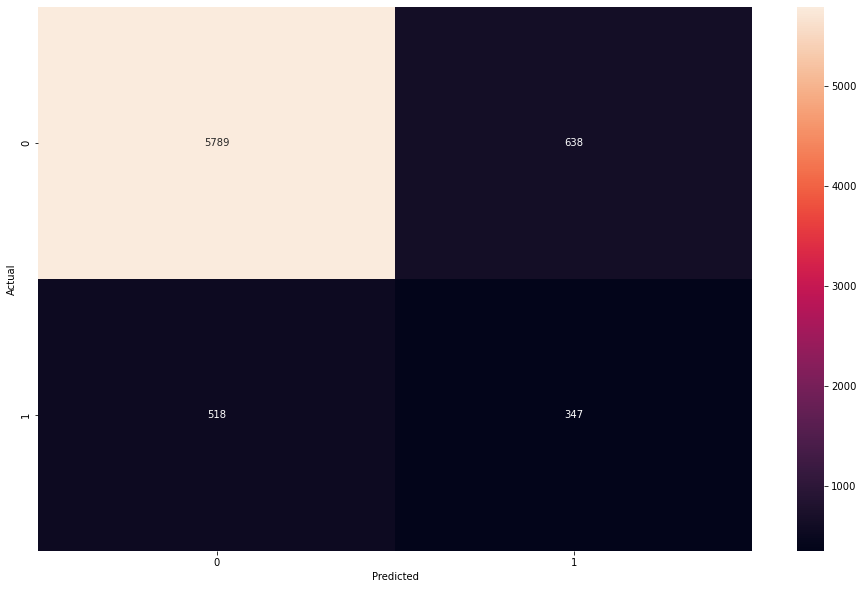

In [36]:
accuracy = accuracy_score(y_test, y_pred_final)
print("Accuracy: ", accuracy * 100.0, "%")

cm = confusion_matrix(y_test, y_pred_final)
ax = sns.heatmap(cm, annot = True, fmt = 'g')
ax.set(xlabel="Predicted", ylabel="Actual")

In [37]:
from xgboost import cv

data_dmatrix = xgb.DMatrix(data=X,label=y)

params = {"objective":"binary:logistic",
  'colsample_bytree': 0.6,
  'gamma': 0.2,
  'learning_rate': 0.2,
  'max_depth': 15,
  'min_child_weight': 6,
  'subsample': 0.8}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=10,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

In [38]:
xgb_cv.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.542604,0.007247,0.531090,0.012048
1,0.624865,0.046776,0.575042,0.030152
2,0.669997,0.031063,0.600177,0.029400
3,0.687778,0.037291,0.609157,0.031942
4,0.729744,0.019251,0.636609,0.024095
